<a href="https://colab.research.google.com/github/drissdunn/PP22-W607/blob/main/W706.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality in Madrid (2001-2018)

In [8]:
#important library
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [9]:
# loading all csv file names
files = glob.glob("csvs_per_year/*.csv")

In [10]:
# reading csv files
for index,file in enumerate(files):
    files[index] = pd.read_csv(file,index_col='date',parse_dates=['date'])

In [11]:
# merging all csv files
df = pd.concat(files)

In [12]:
station_df = pd.read_csv('stations.csv') 

### Visualization of the station dataset

In [13]:
station_df.head()

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604


In [14]:
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         24 non-null     int64  
 1   name       24 non-null     object 
 2   address    24 non-null     object 
 3   lon        24 non-null     float64
 4   lat        24 non-null     float64
 5   elevation  24 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.2+ KB


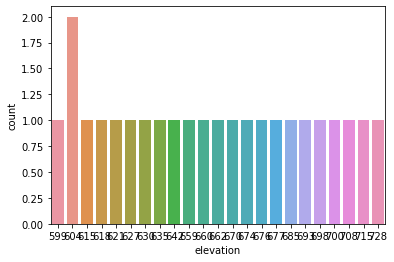

In [15]:
sns.countplot(x = station_df['elevation'])

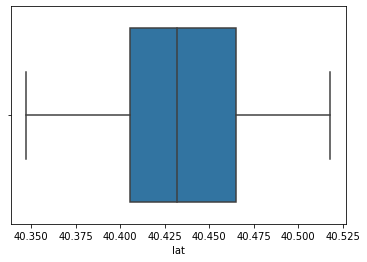

In [16]:
sns.boxplot(x = station_df['lat'])

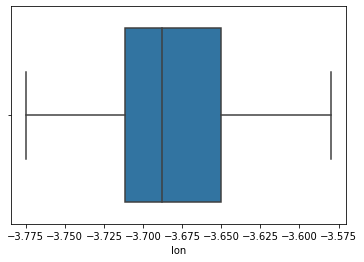

In [17]:
sns.boxplot(x = station_df['lon'])

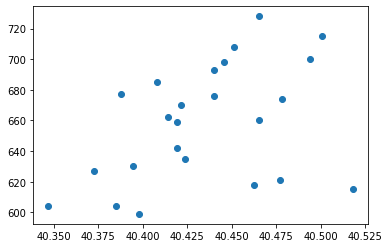

In [18]:
plt.scatter(station_df['lat'], station_df['elevation'])

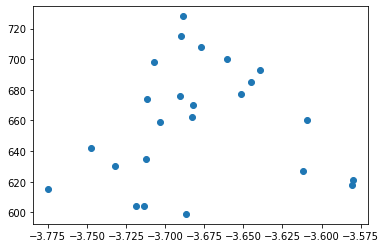

In [19]:
plt.scatter(station_df['lon'], station_df['elevation'])

There is a weak positive correlation between the latitude and the elevation(they tend to rise together) meaning that areas with high latitude can be characterized with air quality such as lower oxygen, strong winds, frigid temperatures etc

The above statement is also true for the longitude but the relationship between latitude and elevation is stronger than that of longitude and elevation.

## Working on the Madrid dataset

In [38]:
df.columns

Index(['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10',
       'PXY', 'SO_2', 'TCH', 'TOL', 'station', 'PM25', 'NO', 'CH4'],
      dtype='object')

Distribution of different pollutants across the years


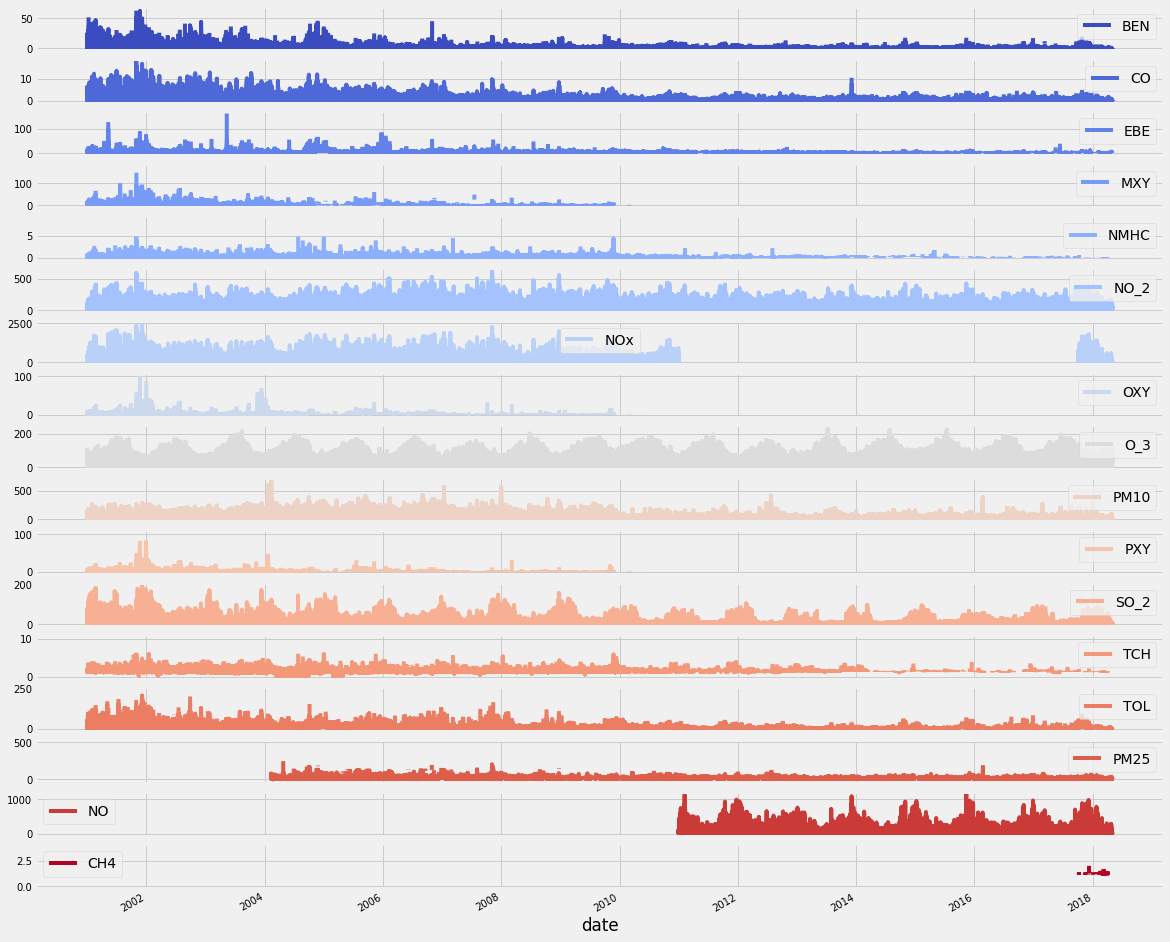

In [40]:
pollutants = ['BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NO_2', 'NOx', 'OXY', 'O_3', 'PM10','PXY', 'SO_2', 'TCH', 'TOL', 'PM25', 'NO', 'CH4']
df_city = df[pollutants]

print('Distribution of different pollutants across the years')
df_city.plot(kind='line',figsize=(18,18),cmap='coolwarm',subplots=True,fontsize=10);

The above graph shows the trend of the pollutants over the given years

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3808224 entries, 2001-08-01 01:00:00 to 2018-02-01 00:00:00
Data columns (total 18 columns):
 #   Column   Dtype  
---  ------   -----  
 0   BEN      float64
 1   CO       float64
 2   EBE      float64
 3   MXY      float64
 4   NMHC     float64
 5   NO_2     float64
 6   NOx      float64
 7   OXY      float64
 8   O_3      float64
 9   PM10     float64
 10  PXY      float64
 11  SO_2     float64
 12  TCH      float64
 13  TOL      float64
 14  station  int64  
 15  PM25     float64
 16  NO       float64
 17  CH4      float64
dtypes: float64(17), int64(1)
memory usage: 552.0 MB


In [ ]:
df.head()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.34,NaN,NaN,28079001,NaN,NaN,NaN
2001-08-01 01:00:00,1.5,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.85,NaN,NaN,28079003,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.80,NaN,NaN,28079039,NaN,NaN,NaN


In [21]:
df.tail()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2018-02-01,NaN,0.5,NaN,NaN,NaN,91.0,192.0,NaN,1.0,35.0,NaN,NaN,NaN,NaN,28079056,22.0,66.0,NaN
2018-02-01,NaN,0.7,NaN,NaN,NaN,107.0,241.0,NaN,NaN,29.0,NaN,15.0,NaN,NaN,28079057,NaN,87.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,48.0,91.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079058,NaN,28.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,103.0,320.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,28079059,NaN,141.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,96.0,202.0,NaN,3.0,26.0,NaN,NaN,NaN,NaN,28079060,NaN,69.0,NaN


In [22]:
descr= df.describe()
descr

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
count,1.041684e+06,2.651012e+06,1.001724e+06,315415.000000,1.085312e+06,3.787050e+06,2.376275e+06,315695.000000,2.991732e+06,2.861255e+06,315584.000000,2.775960e+06,1.086441e+06,1.038929e+06,3.808224e+06,816424.000000,1.532397e+06,14850.000000
mean,1.257431e+00,5.503838e-01,1.407927e+00,4.650394,1.873865e-01,5.047151e+01,1.093188e+02,2.280912,3.982616e+01,2.893654e+01,2.056178,1.065539e+01,1.435882e+00,5.876842e+00,2.807903e+07,13.738292,2.343886e+01,1.300849
std,1.910831e+00,5.354483e-01,2.146109e+00,5.599223,1.539529e-01,3.455288e+01,1.102871e+02,2.639609,3.039249e+01,2.594859e+01,2.395130,9.121267e+00,2.332228e-01,8.524460e+00,2.028574e+01,11.214146,5.021504e+01,0.195550
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.807900e+07,-31.000000,0.000000e+00,0.020000
25%,2.100000e-01,2.600000e-01,3.500000e-01,1.200000,9.000000e-02,2.400000e+01,4.000000e+01,0.960000,1.271000e+01,1.150000e+01,0.800000,5.840000e+00,1.300000e+00,1.100000e+00,2.807901e+07,6.450000,2.000000e+00,1.170000
50%,6.000000e-01,4.000000e-01,8.800000e-01,2.800000,1.500000e-01,4.400000e+01,7.615000e+01,1.320000,3.486000e+01,2.149000e+01,1.280000,8.150000e+00,1.380000e+00,3.160000e+00,2.807902e+07,11.000000,6.000000e+00,1.250000
75%,1.500000e+00,6.500000e-01,1.580000e+00,5.890000,2.400000e-01,6.958000e+01,1.397000e+02,2.740000,5.999000e+01,3.775000e+01,2.510000,1.230000e+01,1.510000e+00,6.990000e+00,2.807904e+07,17.670000,2.000000e+01,1.400000
max,6.639000e+01,1.804000e+01,1.622000e+02,177.600006,9.070000e+00,6.286000e+02,2.537000e+03,103.000000,2.360000e+02,6.950000e+02,106.000000,1.991000e+02,1.048000e+01,2.429000e+02,2.807910e+07,506.899994,1.146000e+03,3.920000


## Handling missing values

In [23]:
#summing up missing values in the data set and saving it in 'missing_count'
missing_count = df.isnull().sum()
missing_count_df = pd.DataFrame(missing_count, columns=['missing_values'])
missing_count_df

,missing_values
BEN,2766540
CO,1157212
EBE,2806500
MXY,3492809
NMHC,2722912
NO_2,21174
NOx,1431949
OXY,3492529
O_3,816492
PM10,946969


In [24]:
#Presenting percentage of data points, missing in each feature
string_percentage = []
float_percentage =[]
for key,value in missing_count.items():
    percent_missing = (value/3808224)*100
    float_percentage.append(percent_missing)
    string_percentage.append(str(percent_missing)+'%')
missing_df = pd.DataFrame(index = missing_count.keys(), columns=['Percentage_missing'])
missing_df['Percentage_missing']= string_percentage
missing_df

,Percentage_missing
BEN,72.64646197282512%
CO,30.387183106876066%
EBE,73.69576999672289%
MXY,91.71753027132857%
NMHC,71.50083608527228%
NO_2,0.556007209659936%
NOx,37.60149087868781%
OXY,91.7101777626526%
O_3,21.440230406614738%
PM10,24.866420672733536%


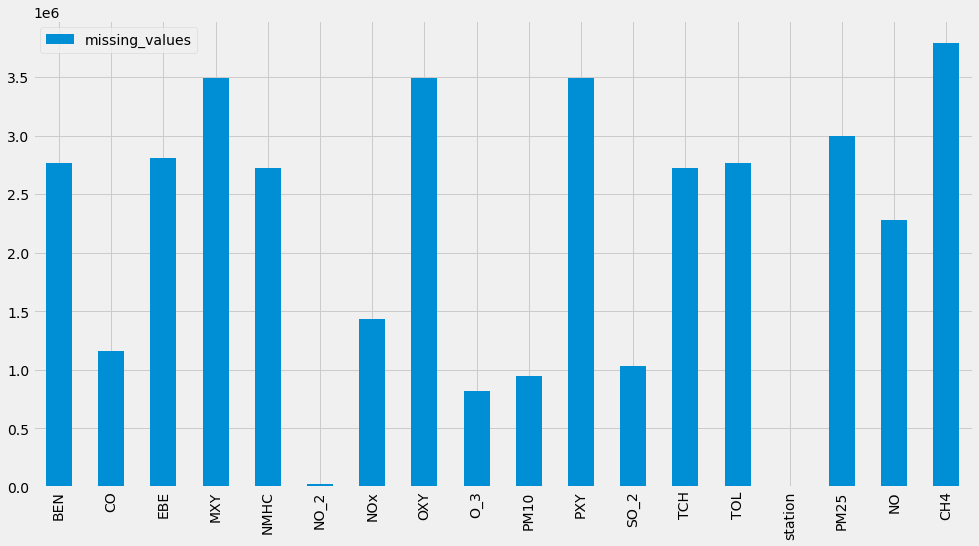

In [25]:
#Plotting the amount of missing data points in the dataset
plt.style.use('fivethirtyeight')
missing_count_df.plot(kind='bar',figsize=(15,8))

In [26]:
#filling missing data with closest data point after 
df_ffill = df.fillna(method='ffill')
#filling missing data with closest data point before
df_bfill = df.fillna(method='bfill')

In [27]:
df_bfill.isnull().sum()

BEN              5
CO               3
EBE              5
MXY        1556880
NMHC             5
NO_2             0
NOx              0
OXY        1556880
O_3              0
PM10             0
PXY        1556880
SO_2             3
TCH              5
TOL              5
station          0
PM25             4
NO               0
CH4              5
dtype: int64

In [28]:
df_drop= df.dropna()
df_drop.shape

(0, 18)

### Inference
<p> We can see that simply replacing the missing values with the nearest datapoints does not completely solve our missing data problem. In addition dropping the rows with missing data causes a total loss of the entire data. we cannot simply replace missing values with random figures like 0 or 1 in other to avoid too great an influence on our data or setting up a kind of data bias.</p>
<p> The following strategy shall be used to handle our missing data;</p>
<ol>
    <li> Features with more than 72% missing data will be dropped. This is because the amount of known data points in these fearures is negligible compared to the amount of missing data. Imputing these values will lead to a huge bias in the data.</li>
    <li> Missing values in other features will be replaced with their median values. This is to preserve the statistical property of each feature as much as possible. Median is used here instead of the mean because the mean can be affected by the presence of outliers </li>
</ol>

In [29]:
#Removing features with more than 72% NAN entries
df_copy = df.copy()
missing_dict = dict(zip(missing_count.keys(),float_percentage))
for key,value in missing_dict.items():
    if value > 72:
        df_copy.drop(key,inplace=True, axis= 1)
df_copy.shape

(3808224, 10)

In [30]:
df.head()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.34,NaN,NaN,28079001,NaN,NaN,NaN
2001-08-01 01:00:00,1.5,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.85,NaN,NaN,28079003,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.80,NaN,NaN,28079039,NaN,NaN,NaN


In [31]:
df_copy.head() 

,CO,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,station,NO
date,,,,,,,,,,
2001-08-01 01:00:00,0.37,NaN,58.400002,87.150002,34.529999,105.000000,6.34,NaN,28079001,NaN
2001-08-01 01:00:00,0.34,0.07,56.250000,75.169998,42.160000,100.599998,8.11,1.24,28079035,NaN
2001-08-01 01:00:00,0.28,NaN,50.660000,61.380001,46.310001,100.099998,7.85,NaN,28079003,NaN
2001-08-01 01:00:00,0.47,NaN,69.790001,73.449997,40.650002,69.779999,6.46,NaN,28079004,NaN
2001-08-01 01:00:00,0.39,NaN,22.830000,24.799999,66.309998,75.180000,8.80,NaN,28079039,NaN


In [32]:
df_copy_missing_dict = df_copy.isnull().sum()
df_copy_missing_dict

CO         1157212
NMHC       2722912
NO_2         21174
NOx        1431949
O_3         816492
PM10        946969
SO_2       1032264
TCH        2721783
station          0
NO         2275827
dtype: int64

In [33]:
df_copy_missing_dict.keys()

Index(['CO', 'NMHC', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2', 'TCH', 'station',
       'NO'],
      dtype='object')

In [34]:
#Replacing missing data in each column with the feature's median value and storing in a new variable 'clean_df'
clean_df = df_copy.copy()
for feature in df_copy_missing_dict.keys():
    clean_df[feature].fillna(clean_df[feature].median(),inplace=True)
clean_df.head()

,CO,NMHC,NO_2,NOx,O_3,PM10,SO_2,TCH,station,NO
date,,,,,,,,,,
2001-08-01 01:00:00,0.37,0.15,58.400002,87.150002,34.529999,105.000000,6.34,1.38,28079001,6.0
2001-08-01 01:00:00,0.34,0.07,56.250000,75.169998,42.160000,100.599998,8.11,1.24,28079035,6.0
2001-08-01 01:00:00,0.28,0.15,50.660000,61.380001,46.310001,100.099998,7.85,1.38,28079003,6.0
2001-08-01 01:00:00,0.47,0.15,69.790001,73.449997,40.650002,69.779999,6.46,1.38,28079004,6.0
2001-08-01 01:00:00,0.39,0.15,22.830000,24.799999,66.309998,75.180000,8.80,1.38,28079039,6.0


In [35]:
#Checking to confirm if missing values have been addressed
clean_df.isnull().sum()

CO         0
NMHC       0
NO_2       0
NOx        0
O_3        0
PM10       0
SO_2       0
TCH        0
station    0
NO         0
dtype: int64

clean_df is the cleaned dataframe with no missiong value